## Задание 1
Импортируйте библиотеки pandas и numpy.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки 
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.
Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.
Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.
Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.


In [56]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [6]:
data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]

In [7]:
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
y = pd.DataFrame(target, columns=["price"])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression

In [45]:
lr = LinearRegression()

In [46]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
y_pred = lr.predict(X_test)

In [48]:
check_test = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})
check_test.head(10)

,y_test,y_pred
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280
76,20.0,23.146689
316,17.8,17.392124
140,14.0,14.078599
471,19.6,23.036927
500,16.8,20.599433


In [49]:
from sklearn.metrics import r2_score

In [50]:
r2_score(y_test, y_pred)

0.711226005748496

## Задание 2
Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000, 
max_depth должен быть равен 12 и random_state сделайте равным 42.
Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression, 
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,
так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.
Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.
Напишите в комментариях к коду, какая модель в данном случае работает лучше.


In [20]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
model = RandomForestRegressor(n_estimators = 1000, max_depth = 12, random_state = 42)

In [73]:
model.fit(X_train, y_train.values[:, 0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [74]:
y_pred = model.predict(X_test)

In [75]:
check_regress = pd.DataFrame({
    "y_test": y_test["price"],
    "y_pred": y_pred.flatten(),
})
check_regress.head(10)

,y_test,y_pred
173,23.6,22.846138
274,32.4,31.156114
491,13.6,16.297226
72,22.8,23.821036
452,16.1,17.212148
76,20.0,21.820092
316,17.8,19.866369
140,14.0,14.759938
471,19.6,21.235224
500,16.8,20.883103


In [76]:
r2_score(y_test, y_pred)

0.8749965273218174

### в данном случае лучше работает модель RandomForestRegressor

## * Задание 3
Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.
С помощью этого атрибута найдите сумму всех показателей важности,
установите, какие два признака показывают наибольшую важность.


In [77]:
?RandomForestRegressor

In [78]:
importances = model.feature_importances_
print(importances)

[0.03211748 0.00154999 0.0070941  0.0011488  0.01436832 0.40270459
 0.01424477 0.06403265 0.00496762 0.01169177 0.01808961 0.0123114
 0.41567892]


In [95]:
indices = np.argsort(importances)[::-1]
for f, idx in enumerate(indices):
    print("{} {} - {}".format(f+1, feature_names[idx], importances[idx]))

1 LSTAT - 0.41567892145099405
2 RM - 0.4027045916967308
3 DIS - 0.06403265381454108
4 CRIM - 0.03211747801029037
5 PTRATIO - 0.018089605464908644
6 NOX - 0.014368315731541823
7 AGE - 0.014244766864655395
8 B - 0.01231139582996545
9 TAX - 0.01169176862189803
10 INDUS - 0.007094098492215249
11 RAD - 0.0049676188426270645
12 ZN - 0.0015499893488862247
13 CHAS - 0.0011487958307451881


- LSTAT    % lower status of the population
- RM       average number of rooms per dwelling


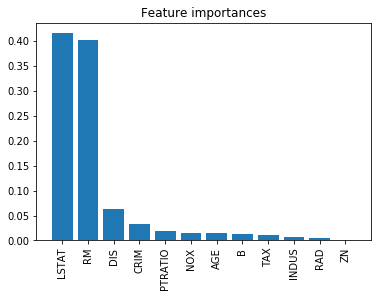

In [112]:
d_first = 12
plt.title("Feature importances")
plt.bar(range(d_first), importances[indices[:d_first]], align='center')
plt.xticks(range(d_first), np.array(feature_names)[indices[:d_first]], rotation=90)
plt.xlim([-1, d_first]);